# ROC curve

In [2]:
import pandas as pd

df=pd.read_csv('c:/workspace3/data/titanic_data.csv')
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [3]:
cols=['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B','deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C','embarked_Q', 'embarked_S']

X=df[cols]
y=df['survived']
y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])

df2=pd.concat([X_samp,y_samp],axis=1)
df2['survived'].value_counts()

survived
0    342
1    342
Name: count, dtype: int64

In [5]:
X=df2[cols]
y=df2['survived']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()   # 평균 0 / 편차 1
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=0)
logit.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [11]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(random_state=0,max_iter=1000)
ann.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [12]:
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train_scaled, y_train)

SVC(random_state=0)

In [18]:
logit.predict_proba(X_test_scaled)

#   0일 확률, 1일 확률

array([[0.22736377, 0.77263623],
       [0.05045422, 0.94954578],
       [0.02123455, 0.97876545],
       [0.12255167, 0.87744833],
       [0.24534545, 0.75465455],
       [0.33133259, 0.66866741],
       [0.90522721, 0.09477279],
       [0.0488622 , 0.9511378 ],
       [0.91659832, 0.08340168],
       [0.2477162 , 0.7522838 ],
       [0.45131969, 0.54868031],
       [0.06158145, 0.93841855],
       [0.72926582, 0.27073418],
       [0.77494044, 0.22505956],
       [0.87492889, 0.12507111],
       [0.86873115, 0.13126885],
       [0.92708983, 0.07291017],
       [0.07351911, 0.92648089],
       [0.19729855, 0.80270145],
       [0.87160853, 0.12839147],
       [0.14757847, 0.85242153],
       [0.59270045, 0.40729955],
       [0.16738522, 0.83261478],
       [0.02852028, 0.97147972],
       [0.92212148, 0.07787852],
       [0.85837088, 0.14162912],
       [0.82580523, 0.17419477],
       [0.04165938, 0.95834062],
       [0.12953104, 0.87046896],
       [0.23211131, 0.76788869],
       [0.

In [13]:
print(logit.score(X_test_scaled, y_test))
print(rf.score(X_test_scaled, y_test))
print(knn.score(X_test_scaled, y_test))
print(ann.score(X_test_scaled, y_test))
print(svm.score(X_test_scaled, y_test))

0.8394160583941606
0.8175182481751825
0.8029197080291971
0.7956204379562044
0.8394160583941606


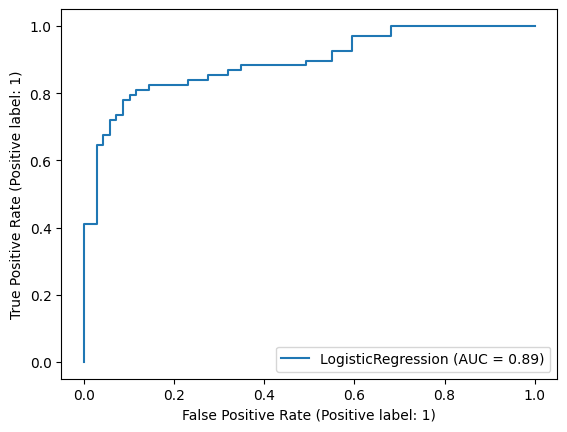

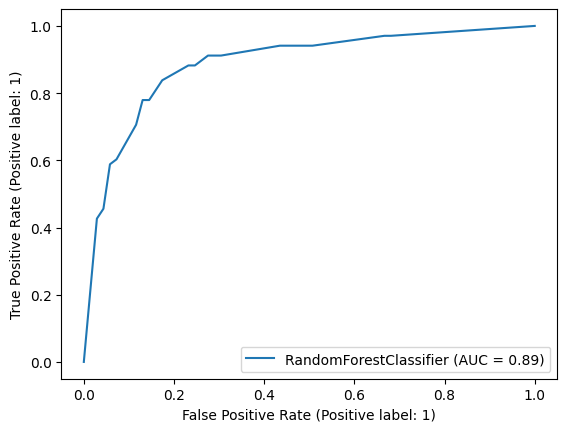

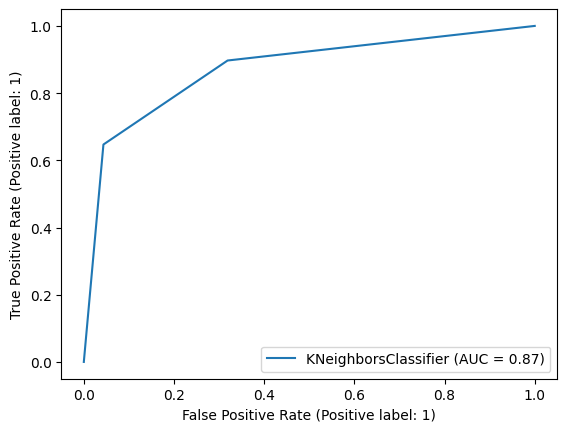

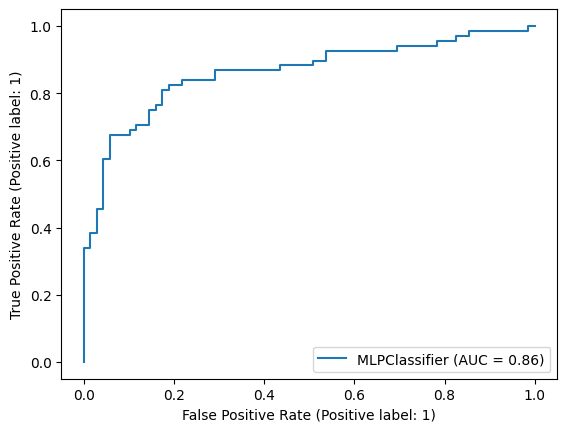

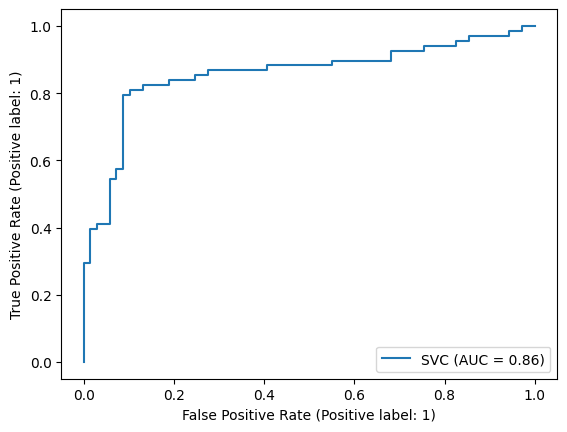

In [14]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logit, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(ann, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)

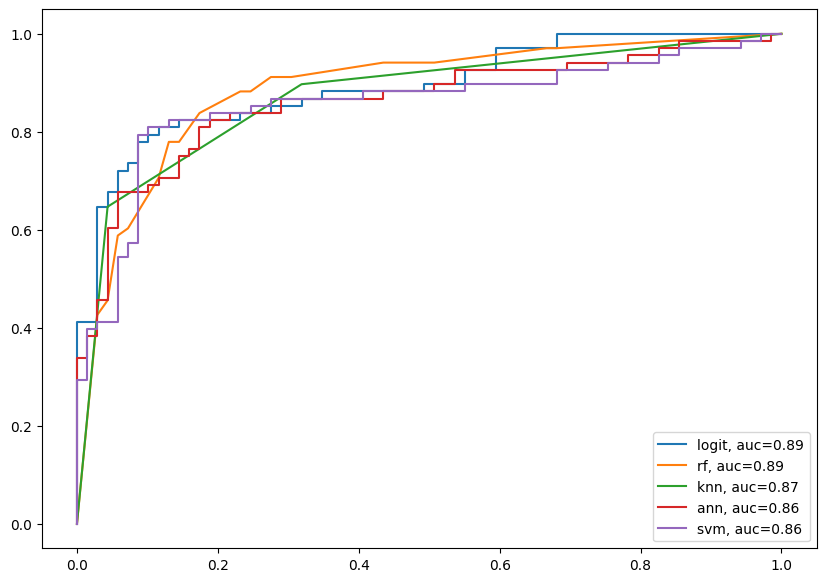

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

# pred=logit.predict_proba(X_test_scaled)[::,1]
pred=logit.decision_function(X_test_scaled)
#               판별 함수
fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred)
auc = metrics.roc_auc_score(y_test, pred)
# 면적(1 x 1 = 1)
plt.plot(fpr,tpr,label="logit, auc="+str(f'{auc:.2f}'))

# RF
pred=rf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="rf, auc="+str(f'{auc:.2f}'))

# KNN
pred=knn.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="knn, auc="+str(f'{auc:.2f}'))

# ANN
pred=ann.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="ann, auc="+str(f'{auc:.2f}'))

# SVM
pred=svm.decision_function(X_test_scaled)
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="svm, auc="+str(f'{auc:.2f}'))

plt.legend()
plt.show()